In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
len(data)

20640

In [5]:
data = data[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value']]
data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [6]:
corr_matrix = data.corr()

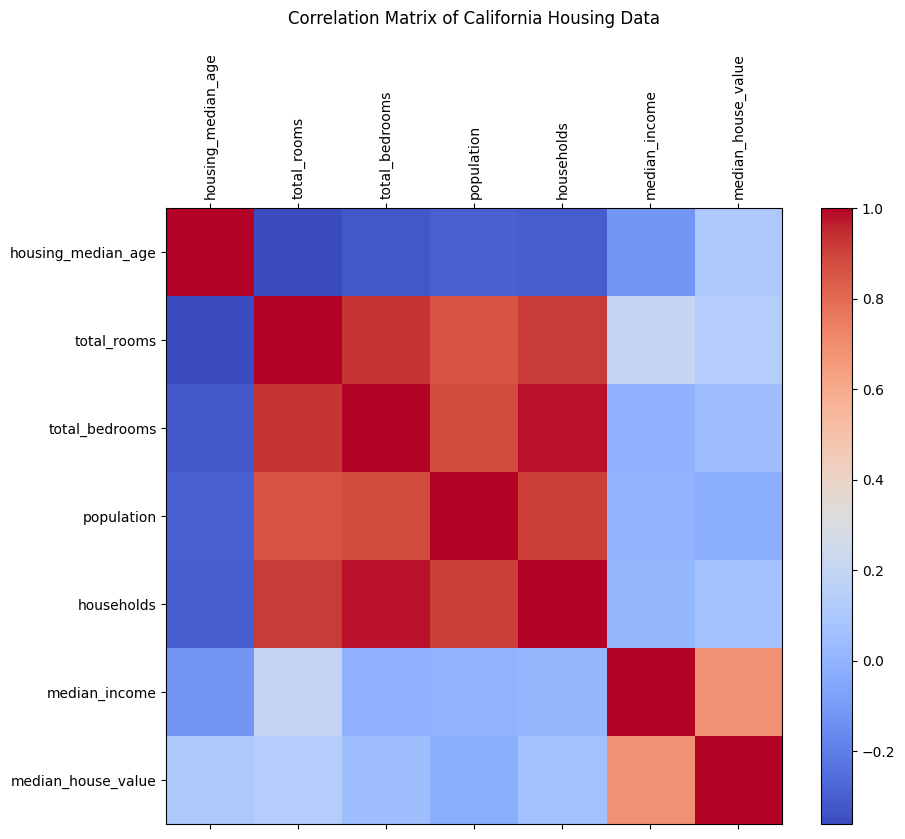

                    housing_median_age  total_rooms  total_bedrooms  \
housing_median_age            1.000000    -0.361262       -0.320451   
total_rooms                  -0.361262     1.000000        0.930380   
total_bedrooms               -0.320451     0.930380        1.000000   
population                   -0.296244     0.857126        0.877747   
households                   -0.302916     0.918484        0.979728   
median_income                -0.119034     0.198050       -0.007723   
median_house_value            0.105623     0.134153        0.049686   

                    population  households  median_income  median_house_value  
housing_median_age   -0.296244   -0.302916      -0.119034            0.105623  
total_rooms           0.857126    0.918484       0.198050            0.134153  
total_bedrooms        0.877747    0.979728      -0.007723            0.049686  
population            1.000000    0.907222       0.004834           -0.024650  
households            0.907222 

In [8]:

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap="coolwarm")

plt.colorbar(cax)


ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)


plt.title("Correlation Matrix of California Housing Data", pad=20)
plt.show()

print(corr_matrix)

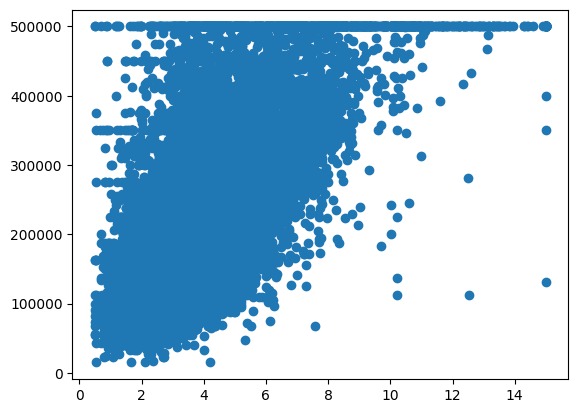

In [9]:
plt.scatter(data['median_income'],data['median_house_value'])

In [10]:
X = data[['median_income']].values  # Feature
y = data['median_house_value'].values  # Target

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X_train, X_test,y_train,y_test = train_test_split(X_scaled,y,shuffle=True,random_state=42)

In [23]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (15480, 1)
X_test shape: (5160, 1)
y_train shape: (15480,)
y_test shape: (5160,)


In [27]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]


In [ ]:
theta = np.zeros(X_train.shape[1])

array([0., 0.])

Learned bias (intercept): 207194.69338918576
Learned weight for median_income: 79851.95630821561


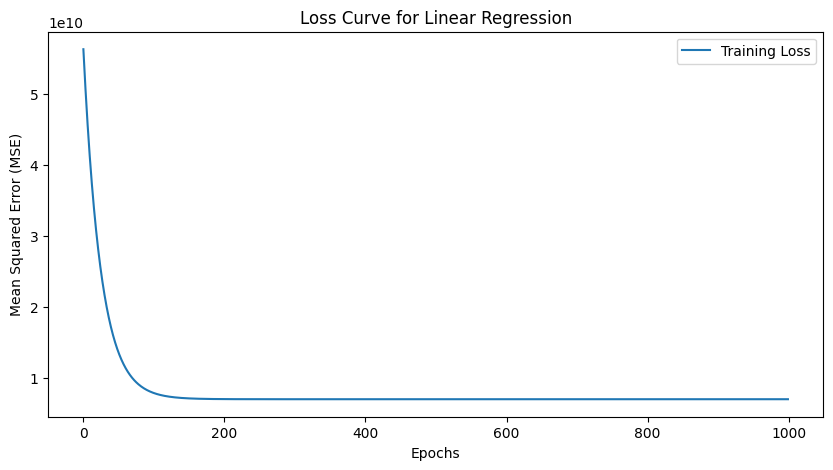

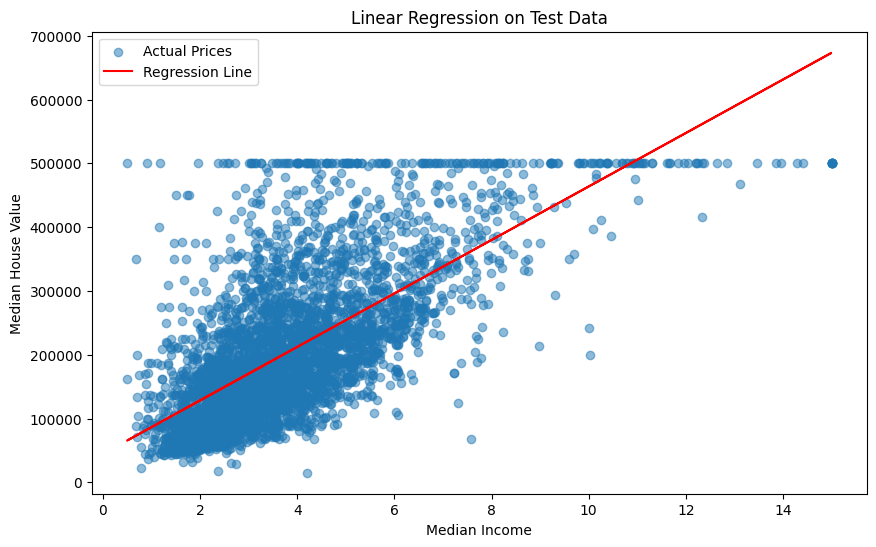

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)  

X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

params = np.random.randn(2)  # [bias, weight]


learning_rate = 0.01
epochs = 1000
mse_history = []


for epoch in range(epochs):

    y_pred = X_train_scaled.dot(params)  
    

    error = y_pred - y_train  
    

    mse = np.mean(error ** 2)
    mse_history.append(mse)
    

    gradient = (2 / X_train_scaled.shape[0]) * X_train_scaled.T.dot(error)
    

    params -= learning_rate * gradient  


bias, weight = params
print("Learned bias (intercept):", bias)
print("Learned weight for median_income:", weight)


plt.figure(figsize=(10, 5))
plt.plot(range(epochs), mse_history, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss Curve for Linear Regression")
plt.legend()
plt.show()


y_test_pred = X_test_scaled.dot(params)


plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label="Actual Prices", alpha=0.5)
plt.plot(X_test, y_test_pred, color="red", label="Regression Line")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.title("Linear Regression on Test Data")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_test_pred = X_test_scaled.dot(params)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Model Evaluation:
Mean Squared Error (MSE): 7091157771.7011
Root Mean Squared Error (RMSE): 84209.0124
Mean Absolute Error (MAE): 62990.8652
R² Score: 0.4589
